Having a hard time making this work

In [7]:
import cv2
from pupil_apriltags import Detector

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import imageio

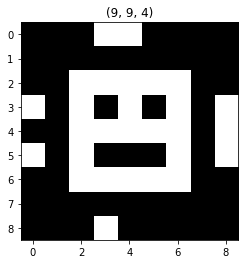

In [22]:
im = cv2.imread("pics/tag21_07_00020.png", cv2.IMREAD_UNCHANGED)
# plt.imshow(im, cmap="gray")
# im = imageio.imread("pics/tag21_07_00020.png")
# im[:,:,3] = 0
plt.imshow(im[:,:,:3])
plt.title(im.shape);

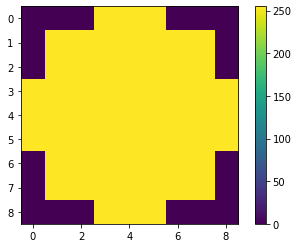

In [21]:
plt.imshow(im[:,:,3])
plt.colorbar();

In [61]:
ii = im[:,:,0].copy()
for i in range(9):
    for j in range(9):
        ii[i,j] = im[i,j,0] if im[i,j,3] != 0 else 127

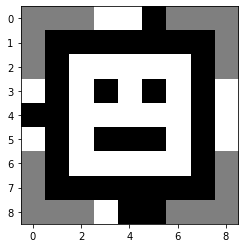

In [62]:
plt.imshow(ii, cmap="gray");

In [59]:
d = Detector(families='tagCircle21h7',
        nthreads=1,
        quad_decimate=1.0,
        quad_sigma=0.0,
        refine_edges=1,
        decode_sharpening=0.25,
        debug=1)

In [60]:
tags = d.detect(ii, estimate_tag_pose=False, camera_params=None, tag_size=None)
print(f"{len(tags)} tags found")

0 tags found


In [52]:
#https://stackoverflow.com/questions/59044973/how-do-i-draw-a-line-indicating-the-orientation-of-an-apriltag
def draw_pose(overlay, camera_params, tag_size, pose, z_sign=1):
    opoints = np.array([
        -2, -2, 0,
        2, -2, 0,
        2, 2, 0,
        2, -2, -4 * z_sign,
    ]).reshape(-1, 1, 3) * 0.5 * tag_size

    fx, fy, cx, cy = camera_params

    K = np.array([fx, 0, cx, 0, fy, cy, 0, 0, 1]).reshape(3, 3)

    rvec, _ = cv2.Rodrigues(pose[:3, :3])
    tvec = pose[:3, 3]

    dcoeffs = np.zeros(5)

    ipoints, _ = cv2.projectPoints(opoints, rvec, tvec, K, dcoeffs)

    ipoints = np.round(ipoints).astype(int)

    ipoints = [tuple(pt) for pt in ipoints.reshape(-1, 2)]

    cv2.line(overlay, ipoints[0], ipoints[1], (0,0,255), 2)
    cv2.line(overlay, ipoints[1], ipoints[2], (0,255,0), 2)
    cv2.line(overlay, ipoints[1], ipoints[3], (255,0,0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(overlay, 'X', ipoints[0], font, 0.5, (0,0,255), 2, cv2.LINE_AA)
    cv2.putText(overlay, 'Y', ipoints[2], font, 0.5, (0,255,0), 2, cv2.LINE_AA)
    cv2.putText(overlay, 'Z', ipoints[3], font, 0.5, (255,0,0), 2, cv2.LINE_AA)

def _draw_cube(overlay, camera_params, tag_size, pose,centroid, z_sign=1):

    opoints = np.array([
        -10, -8, 0,
        10, -8, 0,
        10, 8, 0,
        -10, 8, 0,
        -10, -8, 2 * z_sign,
        10, -8, 2 * z_sign,
        10, 8, 2 * z_sign,
        -10, 8, 2 * z_sign,
    ]).reshape(-1, 1, 3) * 0.5 * tag_size

    edges = np.array([
        0, 1,
        1, 2,
        2, 3,
        3, 0,
        0, 4,
        1, 5,
        2, 6,
        3, 7,
        4, 5,
        5, 6,
        6, 7,
        7, 4
    ]).reshape(-1, 2)

    fx, fy, cx, cy = camera_params

    K = np.array([fx, 0, cx, 0, fy, cy, 0, 0, 1]).reshape(3, 3)

    rvec, _ = cv2.Rodrigues(pose[:3, :3])
    tvec = pose[:3, 3]

    dcoeffs = np.zeros(5)

    ipoints, _ = cv2.projectPoints(opoints, rvec, tvec, K, dcoeffs)

    ipoints = np.round(ipoints).astype(int)

    ipoints = [tuple(pt) for pt in ipoints.reshape(-1, 2)]

    for i, j in edges:
        cv2.line(overlay, ipoints[i], ipoints[j], (0, 255, 0), 1, 16)